<a href="https://colab.research.google.com/github/KSY1526/myblog/blob/master/_notebooks/PythonMachine5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "[머신러닝 가이드] 5-2 선형회귀응용"
- author: Seong Yeon Kim 
- categories: [book, jupyter, Guide, poly, ridge, lasso, Regression]

# 다항 회귀

In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

x = np.arange(4).reshape(2,2) # 행 부터 숫자 채워짐
print('일차 단항식 계수 피처: \n', x)

poly = PolynomialFeatures(degree = 2)
poly.fit(x)
poly_ftr = poly.transform(x)
print('변환된 2차 다항식 계수 피처: \n', poly_ftr)

일차 단항식 계수 피처: 
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처: 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


2차 다항계수는 [1, x1, x2, x1^2, x1x2, x2^2] 로 구성되어 있습니다.

In [4]:
def polynomial_func(x):
    y = 1 + 2 * x[:,0] + 3 * x[:,0] **2 + 4 * x[:,1] **3
    return y

y = polynomial_func(x)

In [7]:
from sklearn.linear_model import LinearRegression

poly_ftr = PolynomialFeatures(degree = 3).fit_transform(x)
print('3차 다항식 계수 feature: \n', poly_ftr)

model = LinearRegression()
model.fit(poly_ftr, y)
print('회귀 계수\n', np.round(model.coef_,2))
print('회귀 shape', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
회귀 shape (10,)


poly함수로 다항식 계수를 생성한 뒤 단순 선형 회귀 함수에 대입해줍니다.

원하는 값인 [1,2,0,3,0,0,0,0,0,4] 와 다소 차이가 있긴 합니다.

# 릿지 회귀

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])

model = model.fit(x,y)
print('회귀 계수\n', np.round(model.named_steps['linear'].coef_,2))

회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


파이프 라인 함수로 다항식으로에 변환과 선형 회귀를 한번에 한 모습입니다.

In [11]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
x_data = bostonDF.drop(['PRICE'], axis = 1, inplace=False)

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('mse scores', np.round(neg_mse_scores,2))
print('rmse scores', np.round(rmse_scores, 2))
print('평균 rmse score:', np.round(avg_rmse,2))

mse scores [-11.42 -24.29 -28.14 -74.6  -28.52]
rmse scores [3.38 4.93 5.31 8.64 5.34]
평균 rmse score: 5.52


단순 선형회귀 모델 rmse 평균값이 5.84로 릿지 회귀가 더 좋은 퍼포먼스를 보입니다.

In [12]:
alphas = [0,0.1,1,10,100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
    print('alpha 값 ', alpha, '일때 평균 rmse :', np.round(avg_rmse,4))

alpha 값  0 일때 평균 rmse : 5.8287
alpha 값  0.1 일때 평균 rmse : 5.7885
alpha 값  1 일때 평균 rmse : 5.6526
alpha 값  10 일때 평균 rmse : 5.5182
alpha 값  100 일때 평균 rmse : 5.3296


alpha 값이 100일때가 가장 값이 좋습니다.

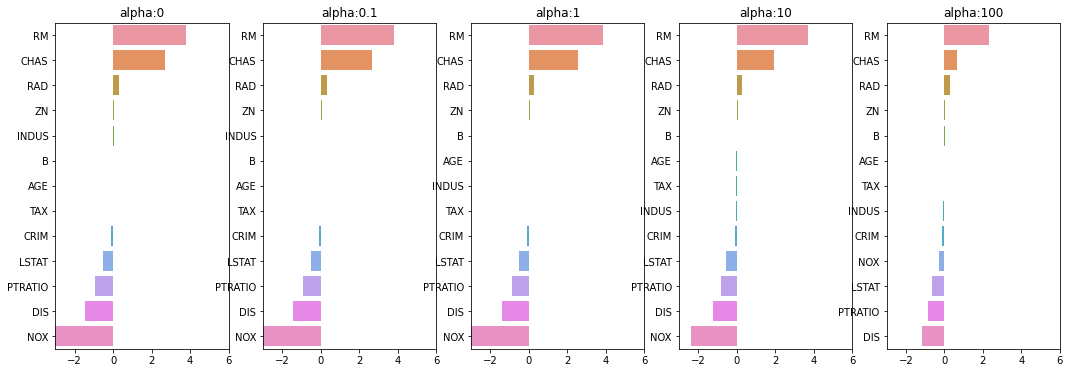

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(figsize= (18,6), nrows = 1, ncols = 5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(x_data, y_target)

    coeff = pd.Series(data=ridge.coef_, index = x_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending = False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y = coeff.index, ax = axs[pos])

plt.show()

알파 값이 커지면(=규제가 세지면) 회귀계수 값이 전반적으로 작아집니다.

다만 릿지 회귀에 경우 회귀 계수를 0으로 만들지는 않습니다.

# 라쏘 회귀

In [16]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params = None, x_data_n = None, y_target_n = None, 
                        verbose= True, return_coeff = True):
    coeff_df = pd.DataFrame()

    if verbose : print(model_name)
    for param in params:
        if model_name =='Ridge' : model = Ridge(alpha = param)
        elif model_name =='Lasso' : model = Lasso(alpha = param)
        elif model_name =='ElasticNet' : model = ElasticNet(alpha = param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, x_data_n, y_target_n, 
                                         scoring = 'neg_mean_squared_error', cv = 5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))

        print('alpha ', param, '일때 평균 rmse:', np.round(avg_rmse,2))

        model.fit(x_data_n, y_target_n)
        if return_coeff:
            coeff = pd.Series(data=model.coef_, index = x_data_n.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

In [20]:
lasso_alphas = [0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso',params=lasso_alphas, x_data_n = x_data, y_target_n= y_target)

Lasso
alpha  0.07 일때 평균 rmse: 5.61
alpha  0.1 일때 평균 rmse: 5.62
alpha  0.5 일때 평균 rmse: 5.67
alpha  1 일때 평균 rmse: 5.78
alpha  3 일때 평균 rmse: 6.19


알파 값이 0.07일때 최고 성능을 보여줍니다. 

앞서 한 릿지보다는 성능이 떨어지지만, 단순 선형 회귀 모델보다 값이 크므로 쓰임새가 있습니다.

In [21]:
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by = sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


계수가 0인것이 보입니다. 알파값이 커질수록 회귀 계수가 0인 것이 늘어납니다.

# 엘라스틱 회귀

다음은 엘라스틱 회귀 입니다. 쉽게 라쏘회귀 + 릿지 회귀로 볼 수 있습니다.

라쏘 회귀에 경우 서로 상관관계가 높은 피처가 있으면 중요 피처를 제외하고 모두 회귀계수를 0으로 만듭니다.

이를 다소 완화해주기 위한 목적으로 만들어졌습니다. 다만 수행시간이 다소 깁니다.

여기서 알파는 알파1 + 알파 2 이며, l1_ratio는 말 그대로 l1규제(라쏘) 비율입니다.

In [22]:
elastic_alphas = [0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, x_data_n= x_data, y_target_n= y_target)

ElasticNet
alpha  0.07 일때 평균 rmse: 5.54
alpha  0.1 일때 평균 rmse: 5.53
alpha  0.5 일때 평균 rmse: 5.47
alpha  1 일때 평균 rmse: 5.6
alpha  3 일때 평균 rmse: 6.07


알파값이 0.5일때 가장 좋은 예측 성능을 보여줍니다.

In [24]:
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_lasso_df.sort_values(by= sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


라쏘모델에 비해 회귀계수를 0으로 만드는 개수가 다소 줄었습니다.

# 선형 회귀 모델을 위한 데이터 변환

선형 회귀에서 중요한 것 중 하나가 데이터 분포도의 정규화 입니다.

특히 타깃값의 분포가 정규분포가 아닌 왜곡(skew)된 분포는 예측 성능에 부정적입니다.

따라서 선형 회귀 모델을 적용하기 전 먼저 데이터 스케일링/정규화 작업을 수행해주어야 합니다.

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def get_scaled_data(method='None', p_degree = None, input_data = None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    if method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [34]:
alphas = [0.1, 1, 10, 100]

scale_methods=[(None, None), ('Standard', None), ('Standard',2),
               ('MinMax',None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
    x_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=x_data)
    print('\n 변환유형:', scale_method[0], ', Polynomial Degree:', scale_method[1])
    get_linear_reg_eval('Ridge', params = alphas, x_data_n=x_data_scaled, y_target_n= y_target, 
                        verbose=False, return_coeff = False) 


 변환유형: None , Polynomial Degree: None
alpha  0.1 일때 평균 rmse: 5.79
alpha  1 일때 평균 rmse: 5.65
alpha  10 일때 평균 rmse: 5.52
alpha  100 일때 평균 rmse: 5.33

 변환유형: Standard , Polynomial Degree: None
alpha  0.1 일때 평균 rmse: 5.79
alpha  1 일때 평균 rmse: 5.65
alpha  10 일때 평균 rmse: 5.52
alpha  100 일때 평균 rmse: 5.33

 변환유형: Standard , Polynomial Degree: 2
alpha  0.1 일때 평균 rmse: 9.14
alpha  1 일때 평균 rmse: 8.94
alpha  10 일때 평균 rmse: 10.56
alpha  100 일때 평균 rmse: 10.57

 변환유형: MinMax , Polynomial Degree: None
alpha  0.1 일때 평균 rmse: 5.79
alpha  1 일때 평균 rmse: 5.65
alpha  10 일때 평균 rmse: 5.52
alpha  100 일때 평균 rmse: 5.33

 변환유형: MinMax , Polynomial Degree: 2
alpha  0.1 일때 평균 rmse: 9.14
alpha  1 일때 평균 rmse: 8.94
alpha  10 일때 평균 rmse: 10.56
alpha  100 일때 평균 rmse: 10.57

 변환유형: Log , Polynomial Degree: None
alpha  0.1 일때 평균 rmse: 4.77
alpha  1 일때 평균 rmse: 4.68
alpha  10 일때 평균 rmse: 4.84
alpha  100 일때 평균 rmse: 6.24


log 변환이 다른 변환에 비해 성능이 뛰어난 걸 볼 수 있습니다.